In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [2]:
from minigrad import Value
from nn import Layer, ReLU, Sequential, Sigmoid

In [3]:
np.random.seed(1337)
random.seed(1337)   

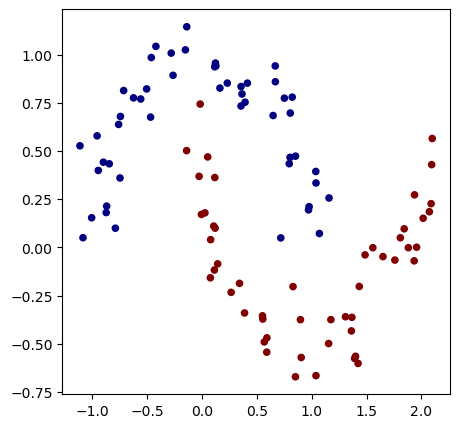

In [14]:
from sklearn.datasets import make_moons, make_blobs
X, y = make_moons(n_samples=100, noise=0.1)

y = y*2 - 1
plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], c=y, s=20, cmap='jet')

In [5]:
model = Sequential(
    Layer(2, 16),
    ReLU(),
    Layer(16, 16),
    ReLU(),
    Layer(16, 1),
    Sigmoid()
)

In [6]:
def loss_fn(y_pred, y) -> Value:
    return -((y * y_pred.log()) + ((1-y) * (1 - y_pred).log()))

In [11]:
def train(X, y, model, loss_fn):
    inputs = [list(map(Value, xrow)) for xrow in X]

    scores = list(map(model, inputs))

    losses = [loss_fn(y_pred[0], y) for y_pred, y in zip(scores, y)]
    loss_value = sum(losses) * (1.0 / len(losses))
    print(f"Train Loss: {loss_value.data:.4f}")

    model.zero_grad()
    loss_value.backwards()

    learning_rate = 0.01
    for p in model.parameters():
        p.data -= learning_rate * p.grad

In [12]:
for epoch in range(50):
    train(X, y, model, loss_fn)

Train Loss: 0.3184
Train Loss: 0.3142
Train Loss: 0.3061
Train Loss: 0.3011
Train Loss: 0.2965
Train Loss: 0.2920
Train Loss: 0.2915
Train Loss: 0.2882
Train Loss: 0.2878
Train Loss: 0.2855
Train Loss: 0.2860
Train Loss: 0.2869
Train Loss: 0.2865
Train Loss: 0.2833
Train Loss: 0.2889
Train Loss: 0.2821
Train Loss: 0.2780
Train Loss: 0.2762
Train Loss: 0.2718
Train Loss: 0.2695
Train Loss: 0.2669
Train Loss: 0.2555
Train Loss: 0.2549
Train Loss: 0.2479
Train Loss: 0.2436
Train Loss: 0.2440
Train Loss: 0.2409
Train Loss: 0.2303
Train Loss: 0.2266
Train Loss: 0.2233
Train Loss: 0.2229
Train Loss: 0.2150
Train Loss: 0.2100
Train Loss: 0.2029
Train Loss: 0.1994
Train Loss: 0.1983
Train Loss: 0.1962
Train Loss: 0.1983
Train Loss: 0.1894
Train Loss: 0.1896
Train Loss: 0.1843
Train Loss: 0.1780
Train Loss: 0.1729
Train Loss: 0.1687
Train Loss: 0.1661
Train Loss: 0.1622
Train Loss: 0.1583
Train Loss: 0.1555
Train Loss: 0.1541
Train Loss: 0.1461
